In [1]:
# Download dataset
! kaggle datasets download -d rabieelkharoua/students-performance-dataset

# Unzip the dataset to the data folder
! mkdir data
! unzip -o students-performance-dataset.zip -d data

# Remove the zip file
! rm students-performance-dataset.zip

Dataset URL: https://www.kaggle.com/datasets/rabieelkharoua/students-performance-dataset
License(s): Attribution 4.0 International (CC BY 4.0)
100%|███████████████████████████████████████| 66.2k/66.2k [00:00<00:00, 504kB/s]
100%|███████████████████████████████████████| 66.2k/66.2k [00:00<00:00, 503kB/s]
mkdir: data: File exists
Archive:  students-performance-dataset.zip
  inflating: data/Student_performance_data _.csv  


# Imports

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns

In [3]:
# Load in csv as pd DataFrame
df = pd.read_csv('data/Student_performance_data _.csv')
df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [4]:
# Get overview of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


In [5]:
# Check for null values
df.isna().sum()

StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64

In [6]:
df.describe()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,2196.500000,16.468645,0.510870,0.877508,1.746237,9.771992,14.541388,0.301421,2.122074,0.383361,0.303512,0.196906,0.157191,1.906186,2.983696
std,690.655244,1.123798,0.499986,1.028476,1.000411,5.652774,8.467417,0.458971,1.122813,0.486307,0.459870,0.397744,0.364057,0.915156,1.233908
min,1001.000000,15.000000,0.000000,0.000000,0.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1598.750000,15.000000,0.000000,0.000000,1.000000,5.043079,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.174803,2.000000
50%,2196.500000,16.000000,1.000000,0.000000,2.000000,9.705363,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.893393,4.000000
75%,2794.250000,17.000000,1.000000,2.000000,2.000000,14.408410,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.622216,4.000000
max,3392.000000,18.000000,1.000000,3.000000,4.000000,19.978094,29.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000


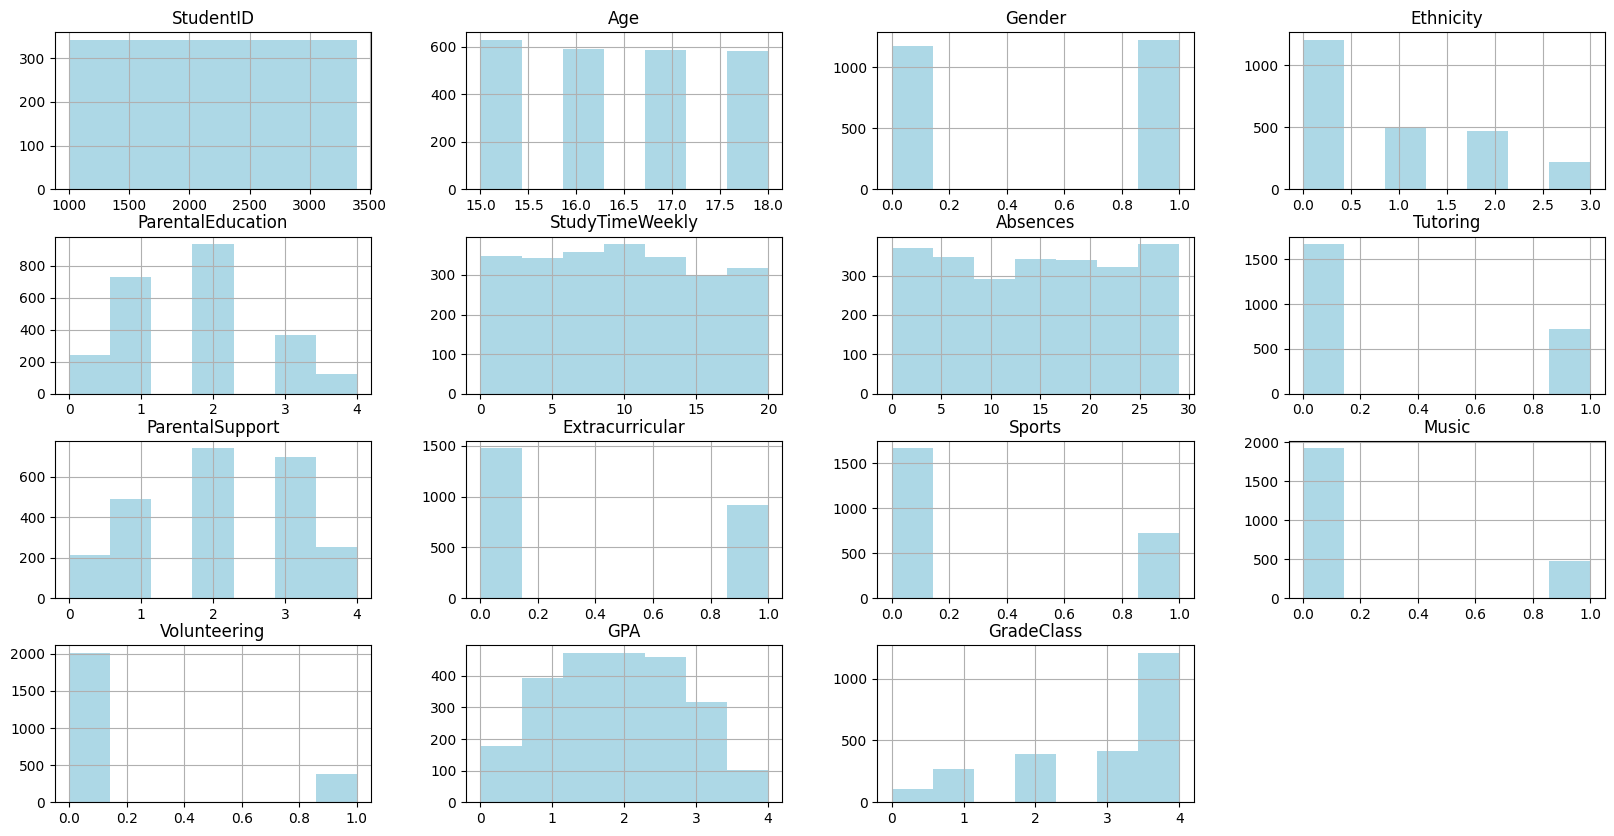

In [7]:
# Visualise feature distributions
hist = df.hist(figsize=(20,10), bins=7, color='lightblue')

Observations
- The GradeClass distribution is skewed, with the majority of students having low scores (high GradeClass values)
- Ethnicity distribution is skewed, with more caucasian

In [8]:
# Determine which features are categorical and numeric based on number of unique values

columns = list(df.columns)

categorical_columns = []
numeric_columns = []

for col in columns:
    if len(df[col].unique()) > 5:
        numeric_columns.append(col)
    else:
        categorical_columns.append(col)

# Remove StudentID as numeric_columns
numeric_columns.remove('StudentID')

# Validate numeric columns contain only numbers by converting to float64
df[numeric_columns] = df[numeric_columns].astype('float64')

In [9]:
# Encode categorical features and scale numeric features
# Using LabelEncoder and StandardScaler from sklearn

label_encoder = LabelEncoder()

for col in df[categorical_columns]:
    df[col] = label_encoder.fit_transform(df[col])

scaler = StandardScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

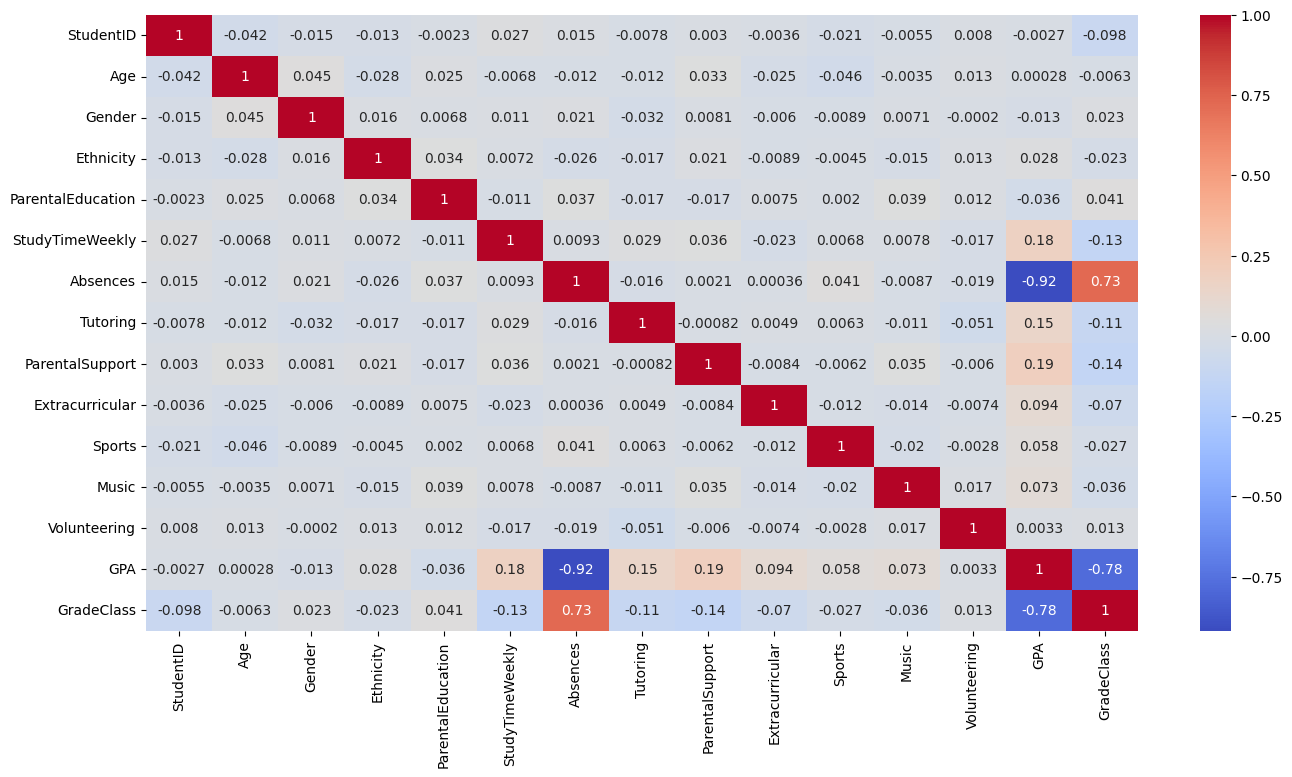

In [10]:
# Correlation among features
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

Observations:
- High correlations between GradeClass and GPA, Absences
- GradeClass is calculated from GPA anyways, so should be removed

In [11]:
# Split dataset in X, y (features, response)
X = df.drop(columns=['GradeClass','GPA','StudentID'])
y = df['GradeClass']

# Split data into training, test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [12]:
# Get feature importances using a RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=42)
clf = clf.fit(X, y)

fimp = pd.Series(data=clf.feature_importances_, index=X.columns).sort_values(ascending=False)

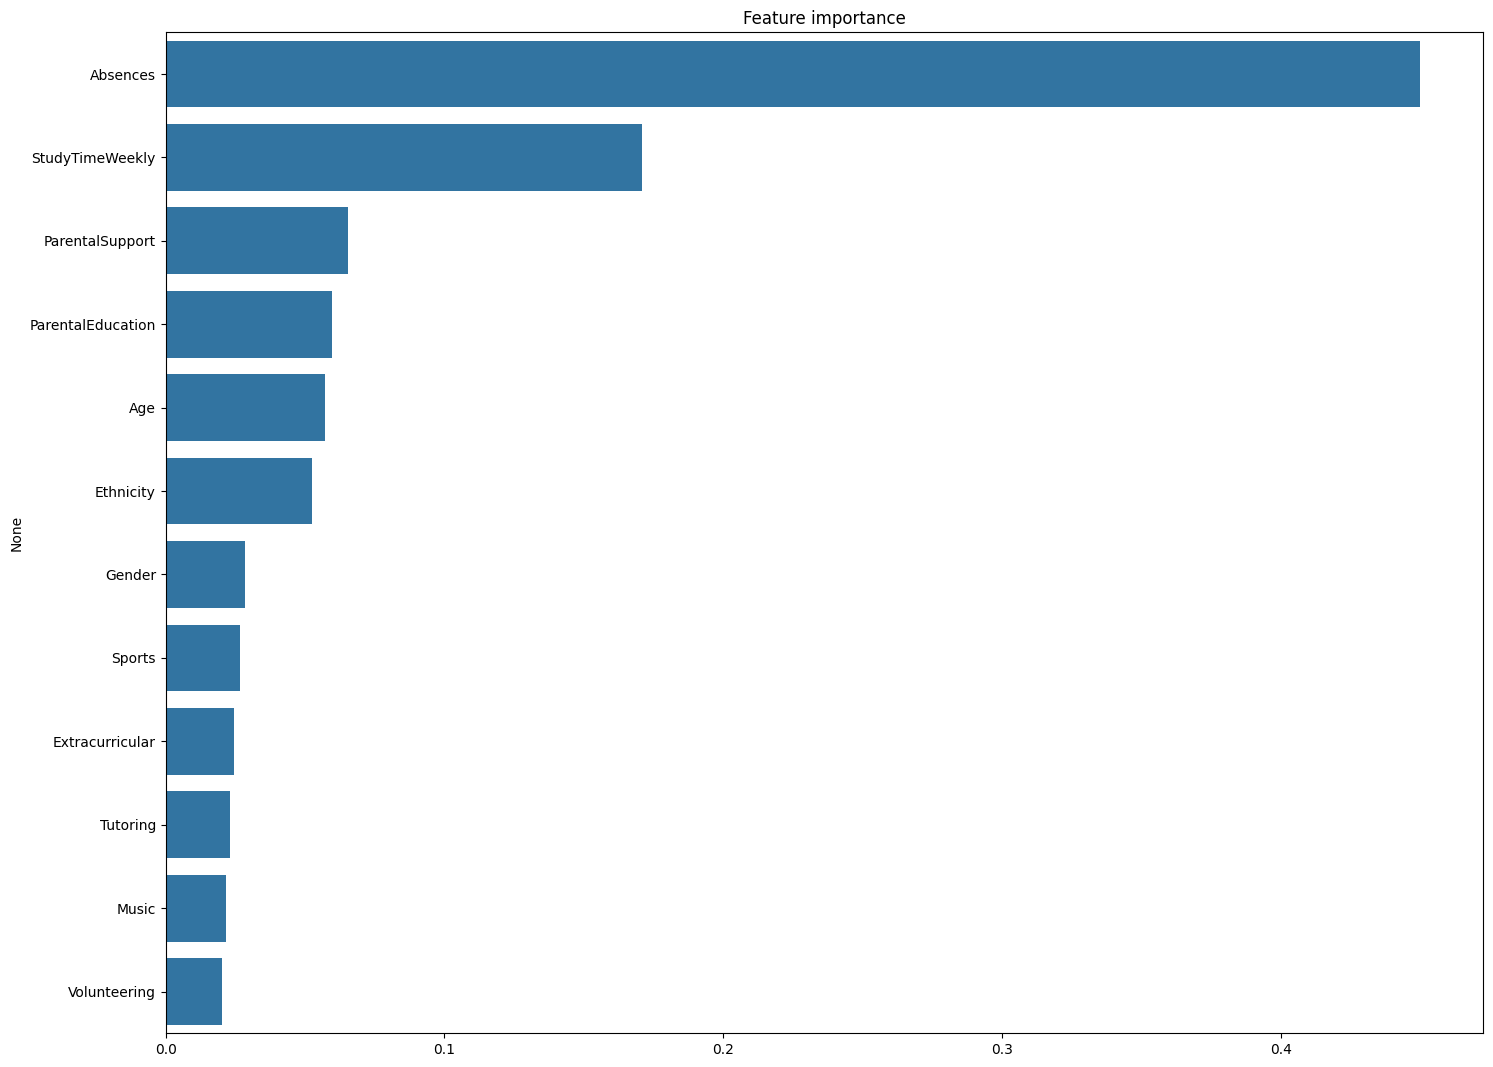

In [13]:
plt.figure(figsize=(17,13))
plt.title('Feature importance')
ax = sns.barplot(y=fimp.index, x=fimp.values, orient='h')

In [14]:
# Creating models
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from catboost import CatBoostClassifier


classification_models = {
    'Logistic Regression': LogisticRegression(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gaussian Naive Bayes': GaussianNB(),
    'XGBoost': XGBClassifier(),
    'CatBoost': CatBoostClassifier(silent=True)
}

model_names = []
accuracies = []

for name, clf in classification_models.items():
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    model_names.append(name)
    accuracies.append(score)
    print(f'{name} accuracy: {score:.2f}')

# Create a DataFrame for model accuracies
df_models = pd.DataFrame({'Model': model_names, 'Accuracy': accuracies})

# Plot model accuracies
import plotly.express as px
fig = px.bar(df_models, x='Model', y='Accuracy', title='Model Accuracies')
fig.show()

Logistic Regression accuracy: 0.73
K-Nearest Neighbors accuracy: 0.65
Support Vector Machine accuracy: 0.73
Decision Tree accuracy: 0.57
Random Forest accuracy: 0.72
Gradient Boosting accuracy: 0.68
AdaBoost accuracy: 0.66
Gaussian Naive Bayes accuracy: 0.67


/Users/nickhunt/Documents/repos/machine-learning/.venv/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


XGBoost accuracy: 0.68
CatBoost accuracy: 0.69


In [20]:
# Find the best model
best_index = accuracies.index(max(accuracies))
best_model_name = model_names[best_index]
best_accuracy = accuracies[best_index]
best_model = classification_models[best_model_name]
print(f'The best model is {best_model_name} with an accuracy of {best_accuracy:.2f}')

The best model is Support Vector Machine with an accuracy of 0.73


Text(0.5, 1.0, 'Accuracy Score: 0.735')

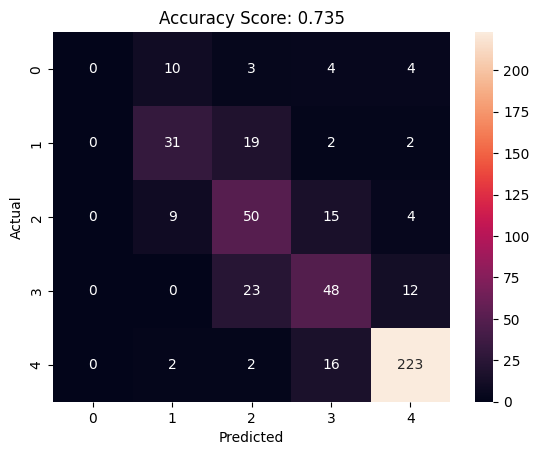

In [31]:
# Initialise and train model
best_model.fit(X_train, y_train)
model_score = best_model.score(X_test, y_test) # score = accuracy for classifiers
y_pred = best_model.predict(X_test)
score = round(accuracy_score(y_test, y_pred), 3)
# Calculate and predict confusion matrix
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='.0f')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Accuracy Score: {model_score:.3f}')

In [35]:
# Hyperparameter tuning
model = SVC()

from sklearn.model_selection import RepeatedStratifiedKFold
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# Define search grid
grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [1, 0.1, 0.001, 0.0001],
    'kernel': ['rbf']
}

# Define search
from sklearn.model_selection import GridSearchCV
search = GridSearchCV(estimator=model, param_grid = grid, cv=cv, scoring='accuracy', n_jobs=1)

# Fit search to training data
result = search.fit(X_train, y_train)

In [37]:
# Summarise result
print(f'Best score: {result.best_score_}')
print(f'Best hyperparameters: {result.best_params_}')

Best score: 0.7515170520651541
Best hyperparameters: {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}


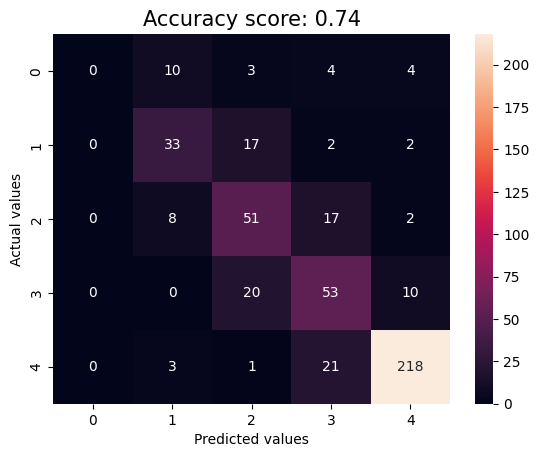

In [38]:
# Evaluate model again
# Initialise and train model
score = result.score(X_test, y_test)
y_pred = result.predict(X_test)

# Calculate and plot confusion matrix
score = round(accuracy_score(y_test, y_pred),3)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='.0f')
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title(f'Accuracy score: {score:.2f}', size=15)
plt.show()

In [39]:
# Reducing dimensionality
# Important features from initial work
fimp.head(3)

Absences           0.450086
StudyTimeWeekly    0.170794
ParentalSupport    0.065480
dtype: float64

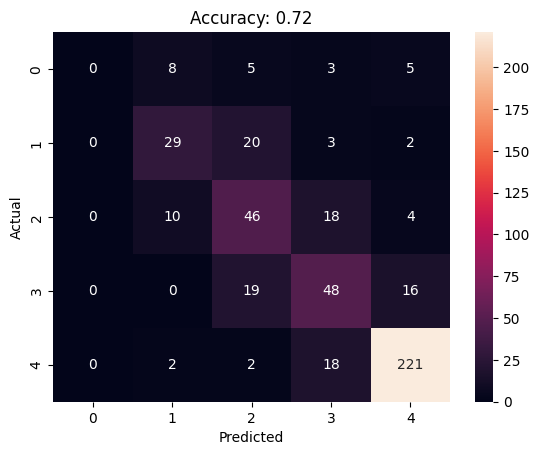

In [52]:
# Try only using important features as predictors
X_train = X_train[['Absences','StudyTimeWeekly','ParentalSupport']]
X_test = X_test[['Absences','StudyTimeWeekly','ParentalSupport']]

model = SVC()
result = model.fit(X_train, y_train)

score = result.score(X_test, y_test)
y_pred = result.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='.0f')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Accuracy: {score:.2f}')
plt.show()